In [1]:
from sympy import *

init_session()

IPython console for SymPy 1.6 (Python 3.8.2-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.6/



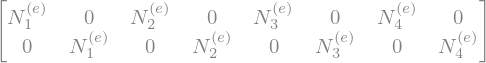

In [2]:
from fractions import Fraction

qsi = symbols("xi")
eta = symbols("eta")

N1_expr = Fraction(1, 4) * (1 - eta) * (1 - qsi)
N2_expr = Fraction(1, 4) * (1 + eta) * (1 - qsi)
N3_expr = Fraction(1, 4) * (1 + eta) * (1 + qsi)
N4_expr = Fraction(1, 4) * (1 - eta) * (1 + qsi)

N1, N2, N3, N4 = symbols("N_1^{(e)} N_2^{(e)} N_3^{(e)} N_4^{(e)}")

Ne = Matrix([[N1, 0, N2, 0, N3, 0, N4, 0], [0, N1, 0, N2, 0, N3, 0, N4]])
Ne

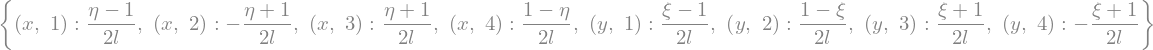

In [3]:
x, y, l = symbols("x y l")

x1, y1 = symbols("x_1 y_1")

x_qsi = l/2 * qsi + x1 + l*(sqrt(2)/2)
y_eta = l/2 * eta + y1 + l*(sqrt(2)/2)

qsi_x = (2/l) * (x - x1 - l*(sqrt(2)/2))
eta_y = (2/l) * (y - y1 - l*(sqrt(2)/2))

N = dict()
Ns = [0, N1_expr, N2_expr, N3_expr, N4_expr]
for i in (x, y):
    for k in range(1, 4 + 1):
        N[(i, k)] = simplify((diff(Ns[k], qsi) * diff(qsi_x, i) + diff(Ns[k], eta) * diff(eta_y, i)))
N

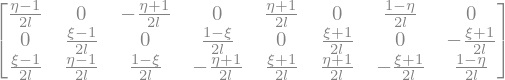

In [4]:
B_matrix = Matrix([[N[(x, (i//2) + 1)] if i % 2 == 0 else 0 for i in range(8)],
                   [N[(y, (i//2) + 1)] if i % 2 == 1 else 0 for i in range(8)],
                   [N[(y if i % 2 == 0 else x, (i//2) + 1)] for i in range(8)]])

B = MatrixSymbol("B", 3, 8)

B_matrix

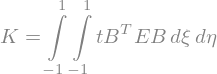

In [7]:
t, v, E = symbols("t nu E")
E_m = MatrixSymbol("E", 3, 3)
E_matrix = simplify((E/(1 - v**2)) * Matrix([[1, v,        0],
                                             [v, 1,        0],
                                             [0, 0, (1 -v)/2]]))
K = MatrixSymbol("K", 8, 8)
Eq(K, Integral(t * B.T * E_m * B, (qsi, -1, 1), (eta, -1, 1)), evaluate=False)

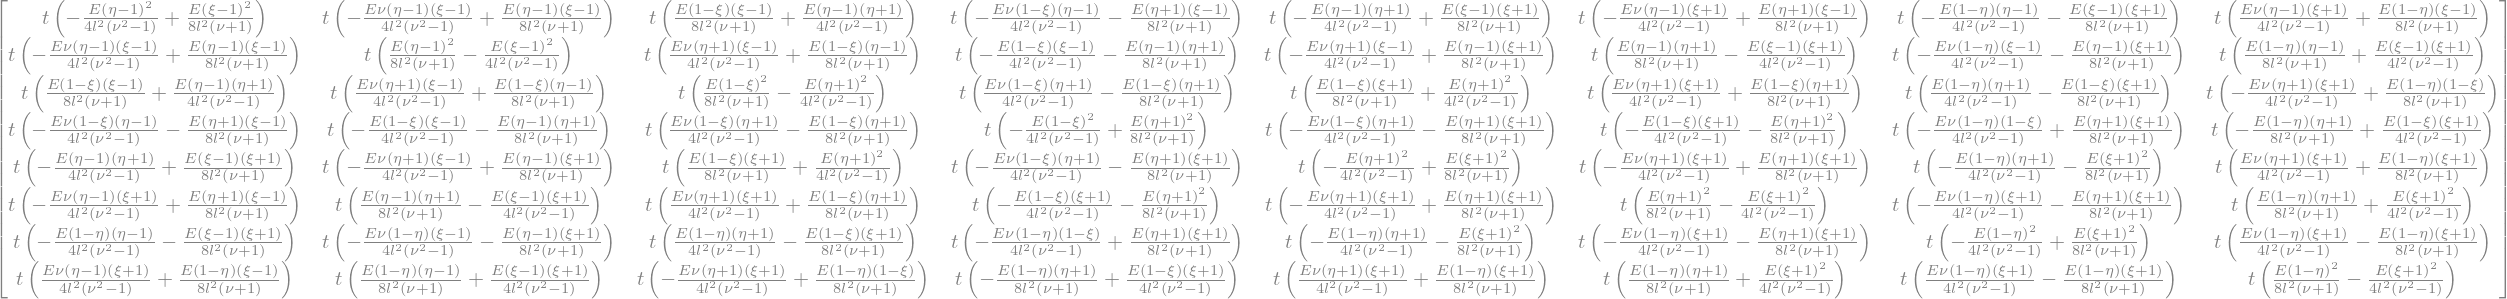

In [15]:
K_matrix = B.T * E_m * B
K_matrix = K_matrix.subs({E_m: E_matrix, B: B_matrix}).doit()

K_matrix = t * K_matrix

K_matrix

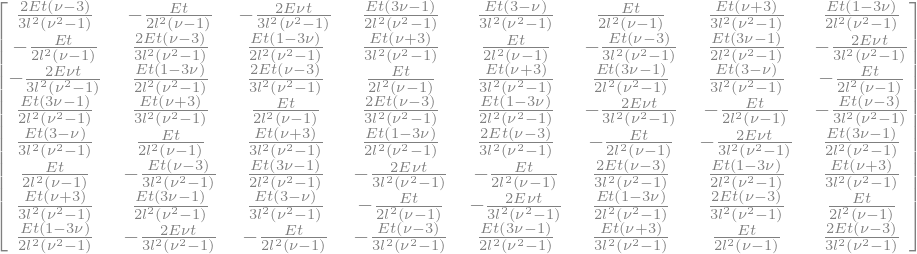

In [16]:
K_matrix = K_matrix.integrate((qsi, -1, 1), (eta, -1, 1))

K_matrix = simplify(K_matrix)

K_matrix

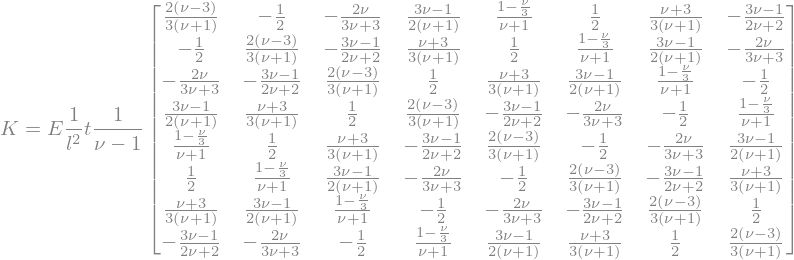

In [39]:
Eq(K, MatMul(E*t/(l**2 * (v - 1)), simplify(K_matrix/((E*t)/(l**2 * (v - 1))))), evaluate=False)

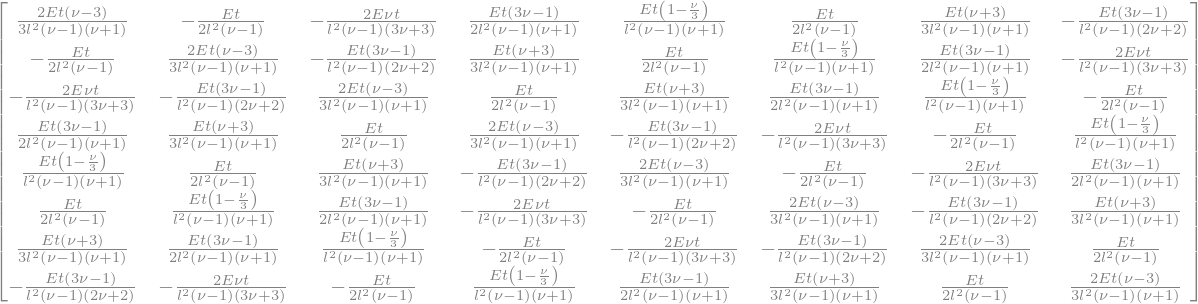